In [38]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

# 1.1
## A. - Načítanie dát do framov
- štruktúry dát a záznamy

In [40]:
df_profiles=pd.read_csv("data/profiles.csv",sep='\t')
df_processes=pd.read_csv("data/processes.csv",sep='\t')
df_devices=pd.read_csv("data/devices.csv",sep='\t')
df_connections = pd.read_csv("data/connections.csv", sep='\t')

### Profiles

In [41]:
df_profiles.rename(columns = {'ssn':'social security number'}, inplace = True)

In [42]:
df_profiles.head()

,mail,imei,birthdate,username,user_id,address,social security number,job,registration,current_location,company,name
0,melissajohnson@gmail.com,3590433799317661495,1927-05-24,onealjason,262,NaN,283-10-3548,NaN,"01/06/2021, 00:00:00","(Decimal('-66.534360'), Decimal('-20.750866'))",Hernandez-Gomez,Sara Allen
1,isabellahenderson@gmail.com,359043379931766338,1952-05-17,achang,351,"11074 Nelson Mills\nPort Douglaston, GA 41980",220-76-7219,NaN,11 Oct 2022,"(Decimal('64.457831'), Decimal('61.662934'))",Wood-Turner,Allen Day
2,abigail33@yahoo.com,359043379931766940,1929-07-04,burgessedward,2558,"0755 Scott Parks Apt. 877\nBowersborough, PW 0...",559-66-9181,Academic librarian,"05/17/2024, 00:00:00","(Decimal('-19.5608945'), Decimal('-175.139772'))","Underwood, Hughes and Alexander",Michelle Martin
3,haleyjanice@hotmail.com,3590433799317661990,1974-09-21,marshlisa,2619,NaN,198-29-6956,NaN,08 Jun 2019,"(Decimal('80.5917705'), Decimal('-34.292908'))",Ramos-Carroll,Samantha Lewis
4,brandy34@gmail.com,8630330696303482196,1926-02-20,gregorystephanie,1630,"99026 Dana Court Apt. 233\nEast Nathanhaven, W...",611-79-1165,NaN,2022/05/28,"(Decimal('-24.8391805'), Decimal('42.738041'))",Williams-Torres,Alan Smith


In [43]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   mail                    2623 non-null   object
 1   imei                    2623 non-null   int64 
 2   birthdate               1443 non-null   object
 3   username                2623 non-null   object
 4   user_id                 2623 non-null   int64 
 5   address                 2230 non-null   object
 6   social security number  2623 non-null   object
 7   job                     787 non-null    object
 8   registration            2623 non-null   object
 9   current_location        2492 non-null   object
 10  company                 2623 non-null   object
 11  name                    2623 non-null   object
dtypes: int64(2), object(10)
memory usage: 246.0+ KB


In [44]:
df_profiles.shape[0] - df_profiles.dropna().shape[0]

2268

In [45]:
df_profiles.isnull().sum()

mail                         0
imei                         0
birthdate                 1180
username                     0
user_id                      0
address                    393
social security number       0
job                       1836
registration                 0
current_location           131
company                      0
name                         0
dtype: int64

In [46]:
df_profiles.isnull().sum().sum()

3540

In [47]:
df_profiles[df_profiles.isnull().any(axis=1)]

,mail,imei,birthdate,username,user_id,address,social security number,job,registration,current_location,company,name
0,melissajohnson@gmail.com,3590433799317661495,1927-05-24,onealjason,262,NaN,283-10-3548,NaN,"01/06/2021, 00:00:00","(Decimal('-66.534360'), Decimal('-20.750866'))",Hernandez-Gomez,Sara Allen
1,isabellahenderson@gmail.com,359043379931766338,1952-05-17,achang,351,"11074 Nelson Mills\nPort Douglaston, GA 41980",220-76-7219,NaN,11 Oct 2022,"(Decimal('64.457831'), Decimal('61.662934'))",Wood-Turner,Allen Day
3,haleyjanice@hotmail.com,3590433799317661990,1974-09-21,marshlisa,2619,NaN,198-29-6956,NaN,08 Jun 2019,"(Decimal('80.5917705'), Decimal('-34.292908'))",Ramos-Carroll,Samantha Lewis
4,brandy34@gmail.com,8630330696303482196,1926-02-20,gregorystephanie,1630,"99026 Dana Court Apt. 233\nEast Nathanhaven, W...",611-79-1165,NaN,2022/05/28,"(Decimal('-24.8391805'), Decimal('42.738041'))",Williams-Torres,Alan Smith
5,thomas19@yahoo.com,8630330696303481008,NaN,ccastillo,1666,357 Victor Passage Apt. 436\nWest Bethanymouth...,484-28-8852,NaN,2017/12/22,"(Decimal('84.193728'), Decimal('3.884744'))",Lambert-Johnson,Valerie Hughes
...,...,...,...,...,...,...,...,...,...,...,...,...
2618,elliotttanner@yahoo.com,359043379931766163,1965-06-29,iwise,1317,"6412 Howard Inlet Apt. 768\nPowerschester, AZ ...",862-14-4391,NaN,2020-01-31,"(Decimal('-62.7250465'), Decimal('38.282017'))",Grant-Copeland,Jennifer Scott
2619,colemanjohn@gmail.com,3590433799317661974,2016-01-13,newtondavid,341,"87717 Julie Lights\nWalshfort, ID 85476",051-61-5574,NaN,2023/08/04,"(Decimal('28.3393865'), Decimal('-124.203268'))",Bryant-Guerra,Joseph Johnston
2620,emily99@hotmail.com,863033069630348594,NaN,oford,1341,"1771 Erin Fords\nGreertown, HI 36614",226-04-2571,NaN,2024/07/15,"(Decimal('37.905153'), Decimal('-84.883507'))",Jones-Wolfe,Steve Wilkinson
2621,martinshelly@gmail.com,8630330696303481032,NaN,iweber,1190,"499 Phyllis Brooks Suite 603\nNorth Kaitlyn, I...",334-79-0999,NaN,"01/01/2022, 00:00:00","(Decimal('45.083678'), Decimal('-141.116386'))","Kim, Anderson and Rice",Deborah Nash


### Devices

In [48]:
df_devices.head()

,latitude,longitude,store_name,code,location,imei
0,30.35028,112.19028,Jingzhou,CN,Asia/Shanghai,359043379931766676
1,40.65995,-111.99633,Kearns,US,America/Denver,359043379931766486
2,16.05670,103.65309,Roi Et,TH,Asia/Bangkok,359043379931766536
3,-17.73648,168.31366,Port-Vila,VU,Pacific/Efate,359043379931766833
4,4.96667,10.70000,Tonga,CM,Africa/Douala,8630330696303481743


In [49]:
df_devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2877 non-null   float64
 1   longitude   2877 non-null   float64
 2   store_name  2877 non-null   object 
 3   code        2876 non-null   object 
 4   location    2877 non-null   object 
 5   imei        2877 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 135.0+ KB


### Processes

In [50]:
df_processes.head()

,ts,imei,mwra,p.android.externalstorage,p.system,p.android.packageinstaller,p.android.settings,p.android.chrome,p.android.gm,p.android.documentsui,...,p.olauncher,p.dogalize,p.android.gms,p.simulator,p.katana,p.inputmethod.latin,p.browser.provider,p.android.defcontainer,p.android.vending,p.google
0,2018-05-05 10:00:00,863033069630348727,0.0,12.71345,13.93596,7.37375,8.63678,7.59294,14.50294,12.49939,...,42.36961,24.39972,38.28394,39.75150,70.08727,35.39702,46.96978,94.36793,19.26230,8.71761
1,2018-05-05 10:01:00,359043379931766122,1.0,14.00354,13.66329,8.76390,8.45907,11.54816,9.23023,10.96660,...,43.50996,96.63160,35.35377,8.57826,21.30530,74.91400,28.78964,98.36045,2.67159,96.75896
2,2018-05-05 10:02:00,359043379931766312,0.0,9.12135,12.02995,15.24475,5.03619,9.25225,11.32397,8.95241,...,62.37735,72.10850,55.73124,85.87342,32.33386,55.19794,89.99140,80.51936,37.73145,89.03029
3,2018-05-05 10:03:00,8630330696303482329,0.0,10.02552,10.88392,15.14466,4.58649,7.65930,12.54341,6.13562,...,46.12254,40.36473,21.76176,0.98452,50.83786,90.78544,49.59389,51.32614,90.17701,39.10998
4,2018-05-05 10:04:00,3590433799317661099,1.0,10.18964,10.99286,8.52306,10.09407,13.85506,9.55446,7.87986,...,70.66280,51.37859,74.10500,42.63423,19.35378,47.21558,95.60708,96.18907,21.60796,33.91152


In [51]:
df_processes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15056 entries, 0 to 15055
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15056 non-null  object 
 1   imei                        15056 non-null  int64  
 2   mwra                        15056 non-null  float64
 3   p.android.externalstorage   15056 non-null  float64
 4   p.system                    15056 non-null  float64
 5   p.android.packageinstaller  15056 non-null  float64
 6   p.android.settings          15056 non-null  float64
 7   p.android.chrome            15056 non-null  float64
 8   p.android.gm                15056 non-null  float64
 9   p.android.documentsui       15056 non-null  float64
 10  p.process.gapps             15056 non-null  float64
 11  p.gms.persistent            15056 non-null  float64
 12  p.notifier                  15056 non-null  float64
 13  p.olauncher                 150

In [52]:
df_processes.iloc[:, 3:12].describe()
### important attributes

,p.android.externalstorage,p.system,p.android.packageinstaller,p.android.settings,p.android.chrome,p.android.gm,p.android.documentsui,p.process.gapps,p.gms.persistent
count,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000
mean,11.728076,11.149077,10.542660,9.902795,9.898074,9.976990,9.389388,0.180378,49.124805
std,2.378698,2.313953,2.551402,2.471244,2.572478,2.751660,2.366524,2.045401,12.829571
min,3.463510,3.050450,1.914620,2.010490,0.879270,0.000000,1.613180,0.000000,0.000000
25%,10.125405,9.424480,8.613357,8.080500,8.042817,8.053158,7.783875,0.001080,40.400868
50%,11.836125,11.326740,10.539715,9.822725,9.915515,9.872410,9.206940,0.006820,49.204910
75%,13.382025,12.882887,12.439132,11.795917,11.822162,11.894415,10.726888,0.043490,57.644330
max,20.060160,19.385580,20.321980,18.162090,17.996590,20.563610,20.220660,100.000000,100.000000


### Connections

In [53]:
df_connections.head()

,ts,imei,mwra,c.android.chrome,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.UCMobile.intl,c.UCMobile.x86,c.raider,c.updateassist,c.android.vending
0,2018-05-05 10:00:00,863033069630348727,0.0,9.60395,12.85710,14.28416,8.18164,12.05903,51.17664,65.36801,90.61716,26.55309,94.42555
1,2018-05-05 10:01:00,359043379931766122,1.0,10.90381,13.52655,15.47703,12.35803,9.31984,52.40056,57.22735,52.52705,57.31544,75.44486
2,2018-05-05 10:02:00,359043379931766312,0.0,7.96027,13.93330,11.48817,10.58834,16.41358,24.55276,80.27819,91.63614,49.51560,93.00705
3,2018-05-05 10:03:00,8630330696303482329,0.0,7.96574,14.28029,11.68449,13.39682,14.09485,44.81360,34.26693,56.53248,4.51390,27.06048
4,2018-05-05 10:04:00,3590433799317661099,1.0,12.77276,10.43295,10.16739,12.20800,6.18137,34.43871,59.20602,79.33347,27.09736,81.58699


In [54]:
df_connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15056 entries, 0 to 15055
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15056 non-null  object 
 1   imei               15056 non-null  int64  
 2   mwra               15056 non-null  float64
 3   c.android.chrome   15056 non-null  float64
 4   c.android.youtube  15056 non-null  float64
 5   c.dogalize         15056 non-null  float64
 6   c.android.gm       15056 non-null  float64
 7   c.katana           15056 non-null  float64
 8   c.UCMobile.intl    15056 non-null  float64
 9   c.UCMobile.x86     15056 non-null  float64
 10  c.raider           15056 non-null  float64
 11  c.updateassist     15056 non-null  float64
 12  c.android.vending  15056 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


In [55]:
df_connections.iloc[:, 3:12].describe()
### important attributes

,c.android.chrome,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.UCMobile.intl,c.UCMobile.x86,c.raider,c.updateassist
count,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000,15056.000000
mean,11.031191,12.338105,11.166158,10.551474,10.006983,44.253556,48.334735,50.020566,50.291662
std,2.711483,1.988046,2.659134,2.710767,2.573995,11.698569,12.946345,28.939532,28.813347
min,1.264880,4.809800,1.448360,1.730240,1.384790,0.000000,0.000000,0.000000,0.000000
25%,9.135158,10.984255,9.299925,8.554515,8.136662,36.325515,39.660190,24.916545,25.573540
50%,11.096905,12.339915,11.265660,10.434125,9.846450,44.348005,48.354590,50.318470,50.540960
75%,12.966405,13.678990,13.054635,12.503325,11.820708,52.239500,57.055532,74.930567,75.256805
max,20.710650,21.205430,21.522060,21.665490,20.036020,100.000000,100.000000,100.000000,100.000000


### Pair Analysis (connections & progress)

array([[<Axes: title={'center': 'c.android.vending'}>,
        <Axes: title={'center': 'p.android.vending'}>]], dtype=object)

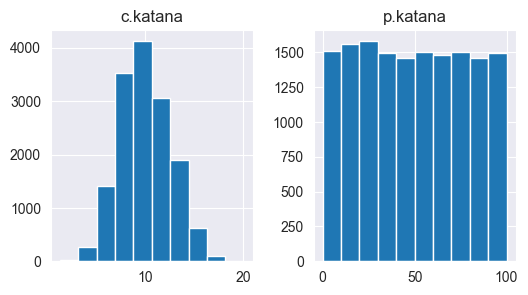

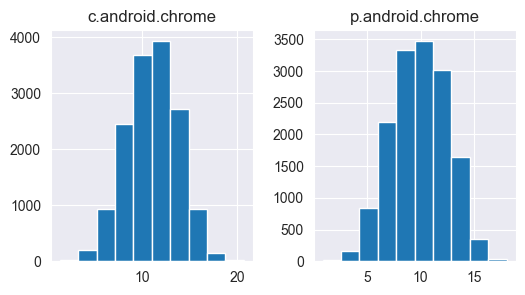

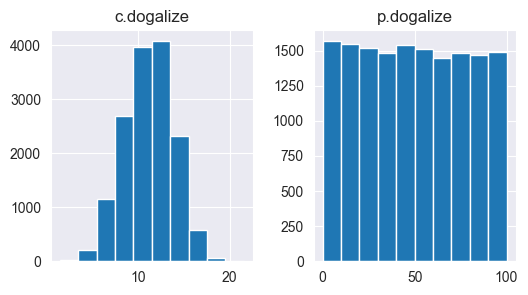

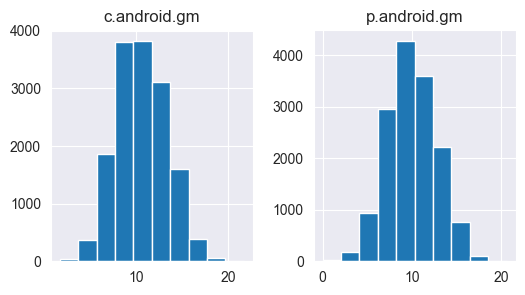

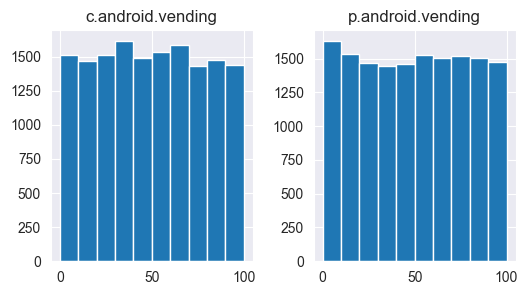

In [56]:
pd.DataFrame({'c.katana': df_connections['c.katana'], 'p.katana': df_processes['p.katana']}).hist(figsize=(6,3))
pd.DataFrame({'c.android.chrome': df_connections['c.android.chrome'], 'p.android.chrome': df_processes['p.android.chrome']}).hist(figsize=(6,3))
pd.DataFrame({'c.dogalize': df_connections['c.dogalize'], 'p.dogalize': df_processes['p.dogalize']}).hist(figsize=(6,3))
pd.DataFrame({'c.android.gm': df_connections['c.android.gm'], 'p.android.gm': df_processes['p.android.gm']}).hist(figsize=(6,3))
pd.DataFrame({'c.android.vending': df_connections['c.android.vending'], 'p.android.vending': df_processes['p.android.vending']}).hist(figsize=(6,3))

1.1 D) vytvorenie korelacnej matice

In [57]:
df_numeric_only = df_connections.select_dtypes(include=[float, int])
correlation_matrix = df_numeric_only.corr()

print(correlation_matrix['mwra'])

imei                -0.002147
mwra                 1.000000
c.android.chrome     0.533619
c.android.youtube   -0.002635
c.dogalize          -0.269175
c.android.gm        -0.000152
c.katana            -0.558710
c.UCMobile.intl     -0.005531
c.UCMobile.x86      -0.002420
c.raider            -0.009644
c.updateassist      -0.002077
c.android.vending   -0.002485
Name: mwra, dtype: float64


vytvorenie heatmapy

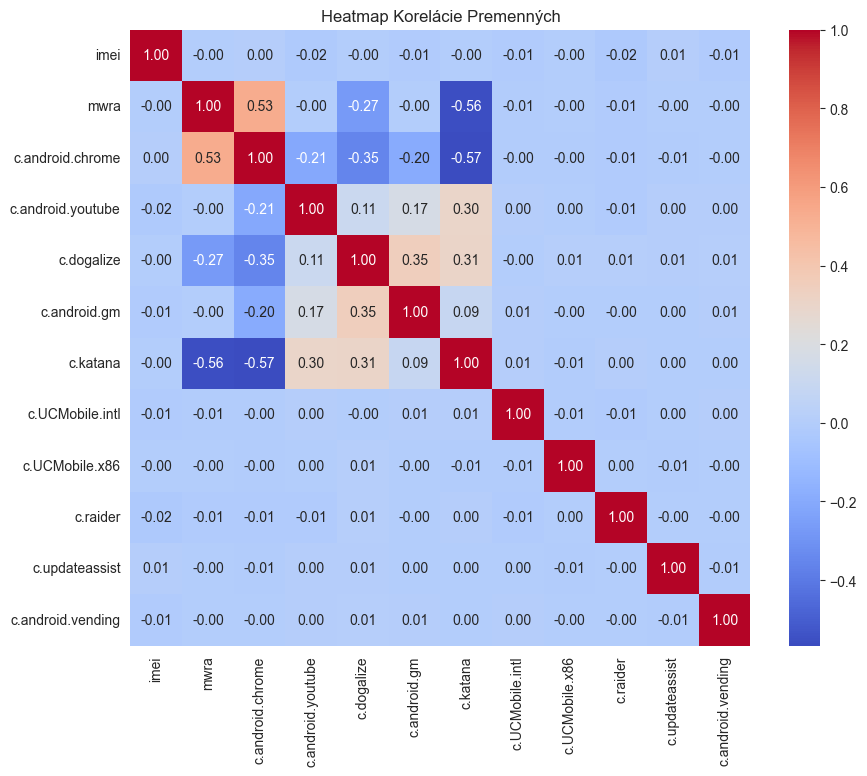

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelácie Premenných')
plt.show()

In [59]:
df_numeric_only = df_processes.select_dtypes(include=[float, int])
correlation_matrix = df_numeric_only.corr()

print(correlation_matrix['mwra'])

imei                         -0.002147
mwra                          1.000000
p.android.externalstorage     0.295697
p.system                     -0.300880
p.android.packageinstaller    0.008005
p.android.settings            0.292846
p.android.chrome              0.277986
p.android.gm                 -0.525956
p.android.documentsui        -0.309486
p.process.gapps               0.053703
p.gms.persistent              0.008762
p.notifier                    0.003516
p.olauncher                  -0.004734
p.dogalize                    0.017844
p.android.gms                 0.008461
p.simulator                   0.004626
p.katana                     -0.008713
p.inputmethod.latin          -0.009371
p.browser.provider            0.009521
p.android.defcontainer       -0.004379
p.android.vending            -0.000621
p.google                      0.000392
Name: mwra, dtype: float64


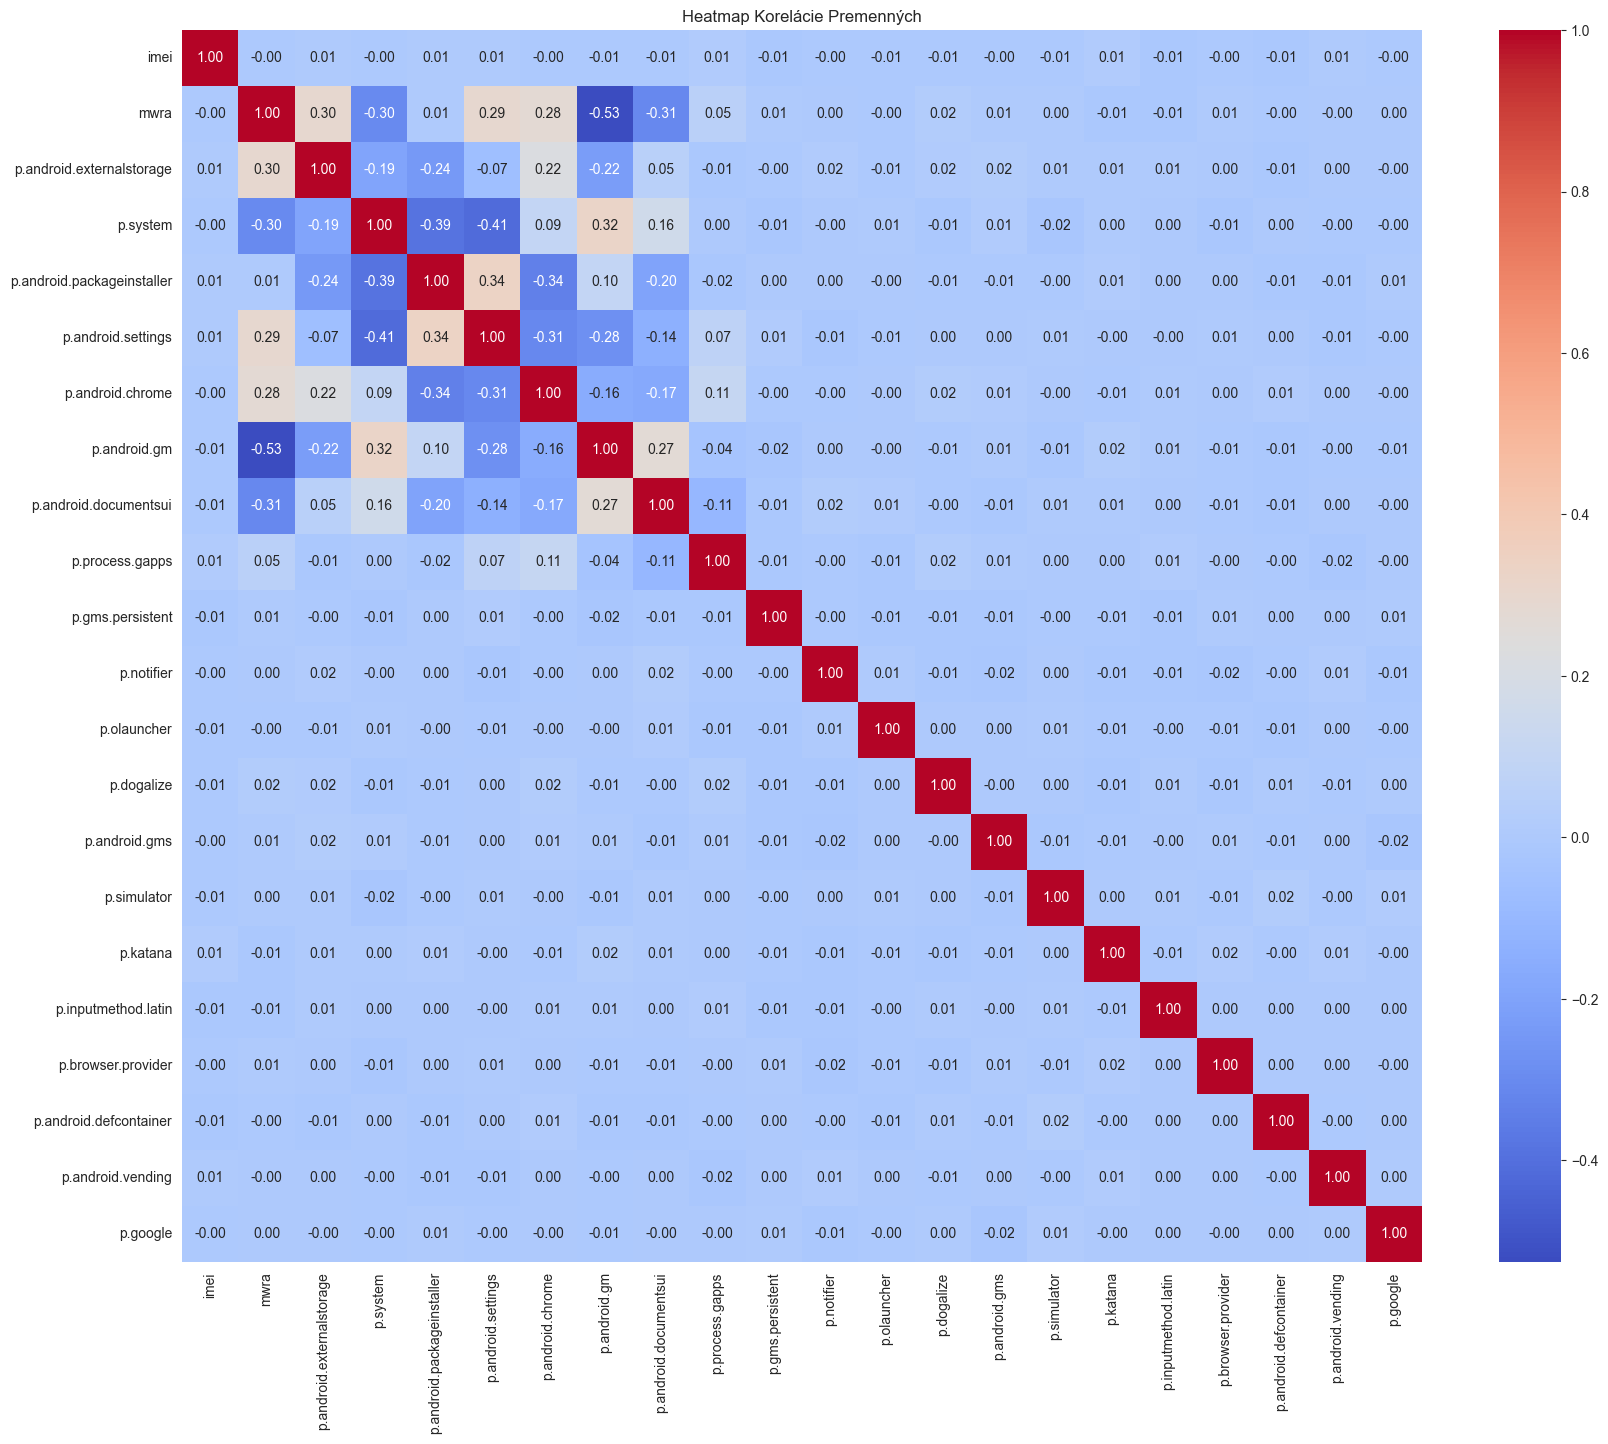

In [61]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelácie Premenných')
plt.show()